In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('wiresharkdata.csv')

In [5]:
df.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,MS-NLB-PhysServer-27_e0:4e:85:4e,Broadcast,ARP,60,Who has 192.168.5.19? Tell 192.168.5.46
1,2,1.022887,MS-NLB-PhysServer-27_e0:4e:85:4e,Broadcast,ARP,60,Who has 192.168.5.19? Tell 192.168.5.46
2,3,2.662287,MS-NLB-PhysServer-27_e0:4e:85:4e,Broadcast,ARP,60,Who has 192.168.5.19? Tell 192.168.5.46
3,4,3.957983,2409:4064:2c8b:2eb2:1024:71cc:f5c9:863c,2a03:2880:f16b:81:face:b00c:0:25de,TLSv1.2,125,Application Data
4,5,3.958293,2409:4064:2c8b:2eb2:1024:71cc:f5c9:863c,2404:6800:4009:824::200e,TLSv1.2,125,Application Data


In [6]:
df.columns

Index(['No.', 'Time', 'Source', 'Destination', 'Protocol', 'Length', 'Info'], dtype='object')

In [7]:
df['Source'].unique()

array(['MS-NLB-PhysServer-27_e0:4e:85:4e',
       '2409:4064:2c8b:2eb2:1024:71cc:f5c9:863c',
       '2a03:2880:f16b:81:face:b00c:0:25de', '2404:6800:4009:824::200e',
       '0.0.0.0', '2404:6800:4002:806::200e', '2404:6800:4009:822::200e',
       '2404:6800:4009:825::2003', '2404:6800:4009:827::200a',
       '2404:6800:4009:815::2001', '2404:6800:4002:809::2003',
       '192.168.5.120', '2404:6800:4009:80c::200e',
       '2409:4064:2c8b:2eb2::42', '2404:6800:4002:80f::2004',
       'fe80::20c:29ff:fecf:3bd4', 'fe80::1b:e0ff:fe4e:854e'],
      dtype=object)

In [8]:
df['Destination'].unique()

array(['Broadcast', '2a03:2880:f16b:81:face:b00c:0:25de',
       '2404:6800:4009:824::200e',
       '2409:4064:2c8b:2eb2:1024:71cc:f5c9:863c', '255.255.255.255',
       '2404:6800:4002:806::200e', '2404:6800:4009:822::200e',
       '2404:6800:4009:825::2003', '2404:6800:4009:827::200a',
       '2404:6800:4009:815::2001', '2404:6800:4002:809::2003',
       '20.44.239.154', '2404:6800:4009:80c::200e', '52.112.115.8',
       '2409:4064:2c8b:2eb2::42', '2404:6800:4002:80f::2004',
       'fe80::20c:29ff:fecf:3bd4', 'fe80::1b:e0ff:fe4e:854e',
       '192.168.5.255'], dtype=object)

In [9]:
df['Protocol'].unique()

array(['ARP', 'TLSv1.2', 'TCP', 'DHCP', 'DNS', 'TLSv1.3', 'ICMPv6',
       'BROWSER'], dtype=object)

In [10]:
df['Length'].unique()

array([  60,  125,   86,  336,  374,  754,  502,  464,  478,  186,  320,
        683, 1444,  797,  442,  562,  134,   98,  110,  171,  177,  195,
        160,  117, 1533,  319,  155,  518,  153,  135, 2259,   93,  142,
         94,  603, 6738,  150,  256, 1092,  185,  148,  713, 1294, 2502,
        415,  122, 1958, 1049,  714, 4918, 1007,  308,  297,  132,  376,
       1200,  466,  446,  149,  523, 1221, 1382,  121,  257,   78,  192,
        646,  373,  243,  178,  520,  105,  225,  143])

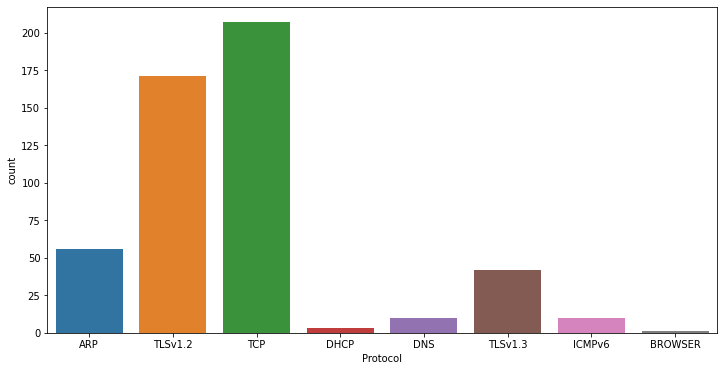

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'Protocol', data = df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

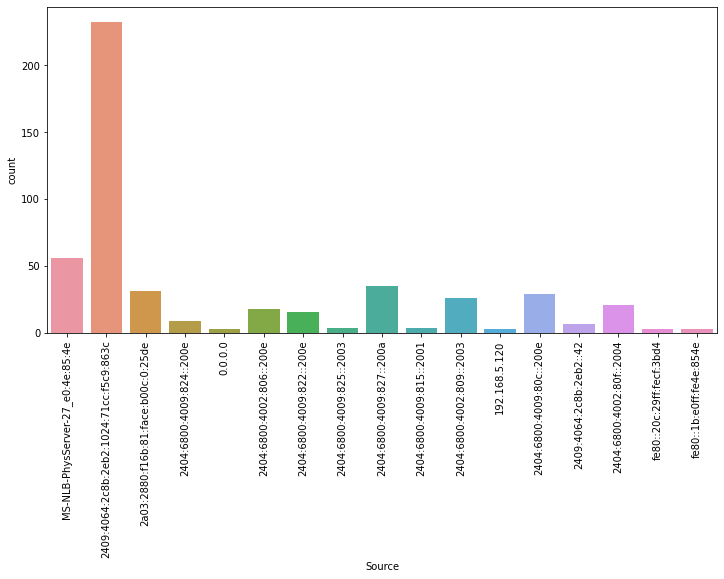

In [12]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'Source', data = df)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text major ticklabel objects>)

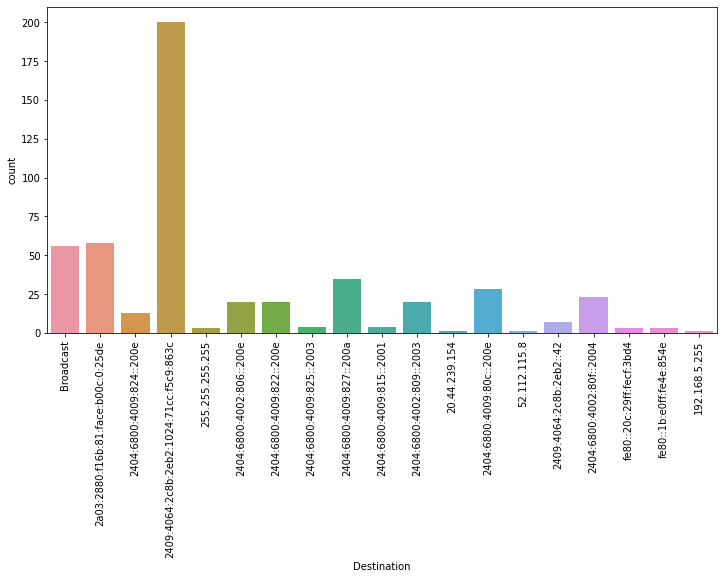

In [13]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'Destination', data = df)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73]), <a list of 74 Text major ticklabel objects>)

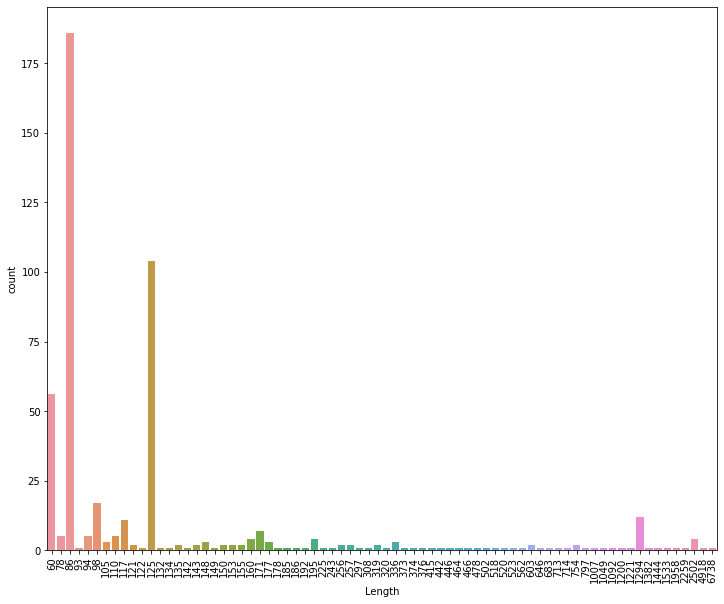

In [14]:
plt.figure(figsize=(12,10))
sns.countplot(x = 'Length', data = df)
plt.xticks(rotation=90)

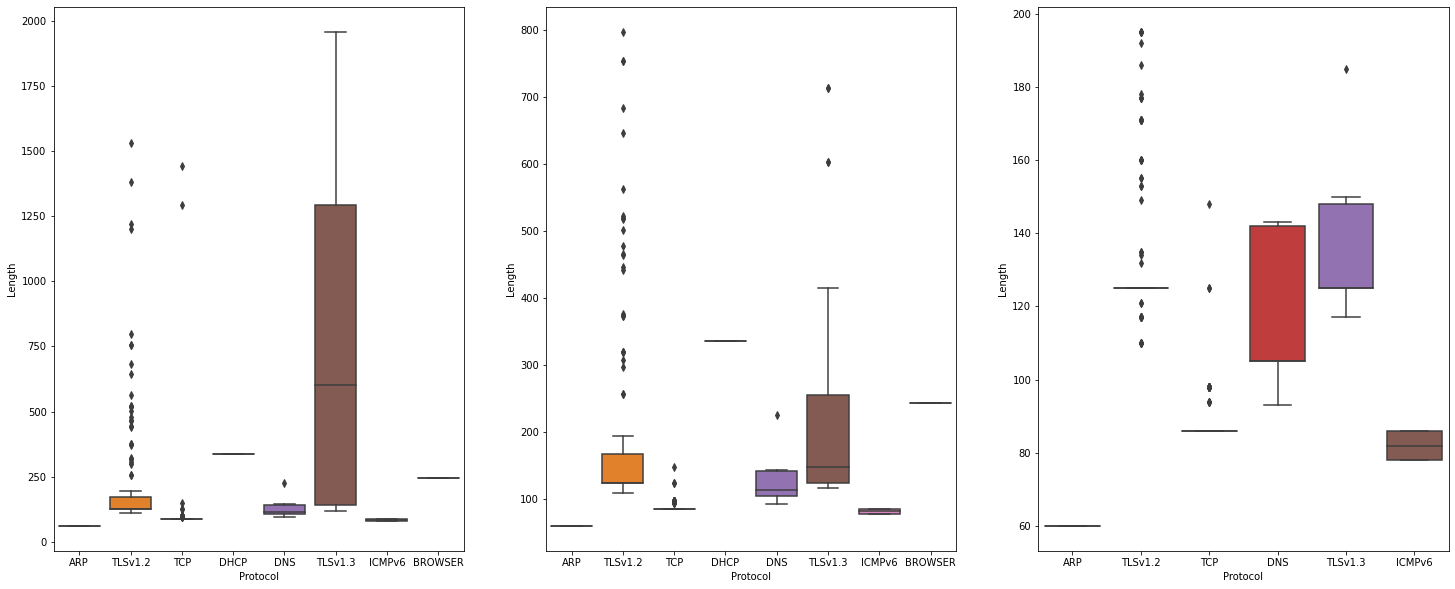

In [15]:
fig, axs = plt.subplots(ncols=3, figsize=(25,10))
df1 = df[df['Length']<2000]
sns.boxplot(x='Protocol', y = 'Length', data = df1, ax = axs[0])
df2= df[df['Length']<800]
sns.boxplot(x='Protocol', y = 'Length', data = df2, ax = axs[1])
df3= df[df['Length']<200]
sns.boxplot(x='Protocol', y = 'Length', data = df3, ax = axs[2])

In [16]:
df3 = df[['Source','Destination','Protocol','Length']]
X = df3.loc[:, df3.columns!='Protocol']
y = df3['Protocol']
X = pd.get_dummies(X)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state =32)

In [18]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [19]:
preds = clf.predict(X_test)

In [20]:
from sklearn.metrics import classification_report, accuracy_score
print(accuracy_score(preds, y_test))
print(classification_report(preds, y_test))

0.9533333333333334
              precision    recall  f1-score   support

         ARP       1.00      1.00      1.00        21
        DHCP       0.00      0.00      0.00         0
         DNS       1.00      1.00      1.00         3
      ICMPv6       1.00      1.00      1.00         4
         TCP       0.96      0.98      0.97        49
     TLSv1.2       0.98      0.92      0.95        60
     TLSv1.3       0.92      0.92      0.92        13

    accuracy                           0.95       150
   macro avg       0.84      0.83      0.83       150
weighted avg       0.97      0.95      0.96       150



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
